In [2]:
!pip install pillow

  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/5e/ae/0d98e3707678c96d86aec0fe5002637801892f17281cc123521ab929e8fd/Pillow-10.0.0-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB 217.9 kB/s eta 0:00:12
   - -------------------------------------- 0.1/2.5 MB 919.0 kB/s eta 0:00:03
   ---- ----------------------------------- 0.3/2.5 MB 2.2 MB/s eta 0:00:02
   --------- ------------------------------ 0.6/2.5 MB 3.6 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.5 MB 4.4 MB/s eta 0:00:01
   ----------------- ---------------------- 1.1/2.5 MB 4.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.5/2.5 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 2.0/2.5 MB 5.6 MB/s eta 0:00:01
   -------------------------------------- - 2

In [3]:
from PIL import Image
import os
import numpy as np

In [7]:
data_dir = "./images/"
files= os.listdir(data_dir)

In [8]:
images = []
for file in files:
    path = os.path.join(data_dir, file)
    images.append(np.array(Image.open(path)))

In [6]:
import tensorflow as tf

In [9]:
resized_images = np.array(np.zeros((len(images), 224, 224, 3)))
for i in range(len(images)):
    resized_images[i] = tf.image.resize(images[i], [224,224])

preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(resized_images)

In [10]:
mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights = "imagenet")

y_pred = mobilenet_imagenet_model.predict(preprocessed_images)
topK = 1
y_pred_top = tf.keras.applications.mobilenet_v2.decode_predictions(y_pred, top = topK)

35363/35363 [==============================] - 0s 2us/step


In [15]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/6d/f8/ff4acac6ea3f896146fd2a9f76dafb7c36973f2a329cae1d60a7c7252395/matplotlib-3.7.2-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/b2/e5/6a7a6f2bdfcc0a235adf6f40be4f0ab5d23e65b766af1b2570c26b33d3b3/contourpy-1.1.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ee/d1/405b6d7a84cfd43cad518bf3d243433d637ada0add65e93110f5f480f86a/fonttools-4.42.1-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/154.1 kB ? eta -:--:--
     ------- ------------------------------- 30.7/154.1 kB 1.3 MB/s eta 0:00:01
     ----------------------- --------------- 92.2/154.1 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  153.6/154.1 kB 1.8 MB/s eta 0:00:01
     ----------------------------------

In [16]:
from matplotlib import pyplot as plt

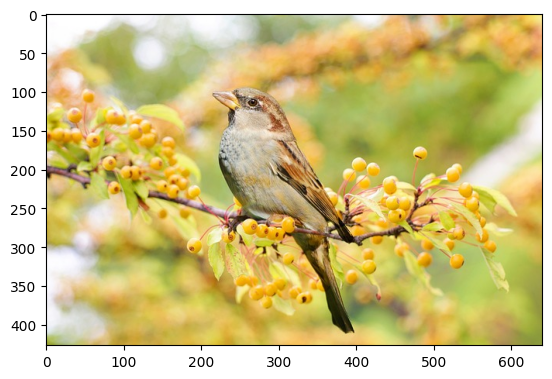

junco (35.2%)


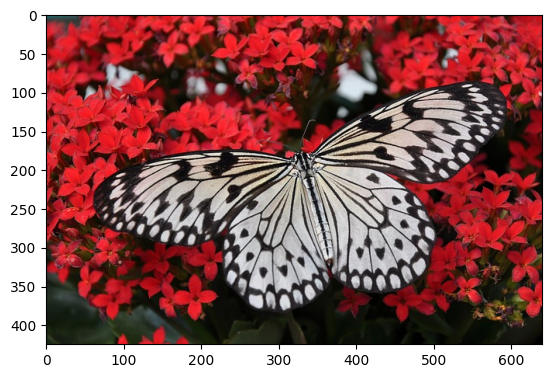

monarch (55.6%)


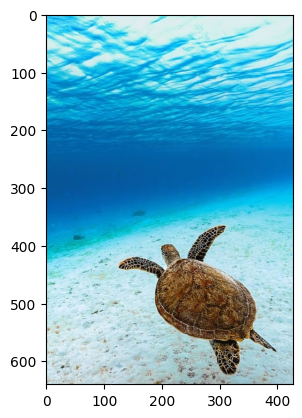

leatherback_turtle (31.8%)


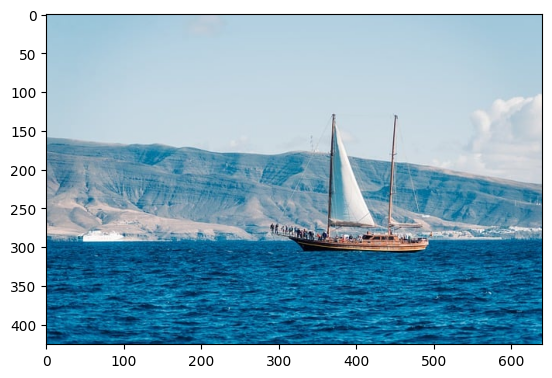

yawl (29.9%)


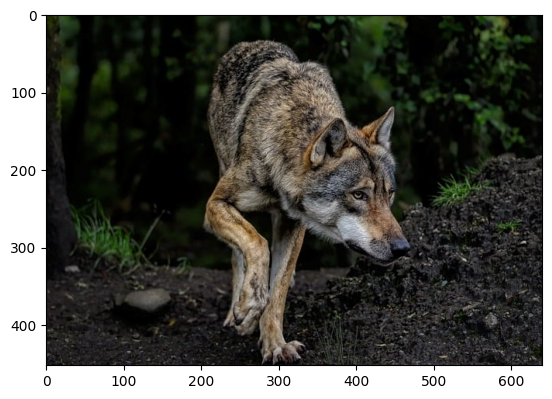

coyote (58.0%)


In [17]:
for i in range(len(images)):
    plt.imshow(images[i])
    plt.show()

    for k in range(topK):
        print(f'{y_pred_top[i][k][1]} ({round(y_pred_top[i][k][2] * 100, 1)}%)')